# CONTEXT


The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa. Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area

# OBJECTIVE

he objective of this project is to explore and build a linear regression model that will predict the spending behaivior of tourists visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania

# IMPORTING LIBRARIES AND DATASET

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
# importing dataset into environment

tz = pd.read_csv('train(1).csv')
tz


ID                   country age_group        travel_with  \
0        tour_0                SWIZERLAND     45-64  Friends/Relatives   
1       tour_10            UNITED KINGDOM     25-44                NaN   
2     tour_1000            UNITED KINGDOM     25-44              Alone   
3     tour_1002            UNITED KINGDOM     25-44             Spouse   
4     tour_1004                     CHINA      1-24                NaN   
...         ...                       ...       ...                ...   
4804   tour_993                       UAE     45-64              Alone   
4805   tour_994  UNITED STATES OF AMERICA     25-44             Spouse   
4806   tour_995               NETHERLANDS      1-24                NaN   
4807   tour_997              SOUTH AFRICA     25-44  Friends/Relatives   
4808   tour_999            UNITED KINGDOM     25-44             Spouse   

      total_female  total_male                         purpose  \
0              1.0         1.0            Leisure and Holidays   
1              1.0         0.0            Leisure and Holidays   
2              0.0         1.0  Visiting Friends and Relatives   
3              1.0         1.0            Leisure and Holidays   
4              1.0         0.0            Leisure and Holidays   
...            ...         ...                             ...   
4804           0.0         1.0                        Business   
4805           1.0         1.0            Leisure and Holidays   
4806           1.0         0.0            Leisure and Holidays   
4807           1.0         1.0                        Business   
4808           1.0         1.0            Leisure and Holidays   

         main_activity                   info_source tour_arrangement  ...  \
0     Wildlife tourism            Friends, relatives      Independent  ...   
1     Cultural tourism                        others      Independent  ...   
2     Cultural tourism            Friends, relatives      Independent  ...   
3     Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4     Wildlife tourism  Travel, agent, tour operator      Independent  ...   
...                ...                           ...              ...  ...   
4804   Hunting tourism            Friends, relatives      Independent  ...   
4805  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   
4806  Wildlife tourism                        others      Independent  ...   
4807     Beach tourism  Travel, agent, tour operator      Independent  ...   
4808  Wildlife tourism  Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
0                      No                  No                  No   
1                      No                  No                  No   
2                      No                  No                  No   
3                     Yes                 Yes                 Yes   
4                      No                  No                  No   
...                   ...                 ...                 ...   
4804                   No                  No                  No   
4805                  Yes                 Yes                 Yes   
4806                   No                  No                  No   
4807                   No                  No                  No   
4808                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
0                   No           13.0            0.0         Cash   
1                   No           14.0            7.0         Cash   
2                   No            1.0           31.0         Cash   
3                   No           11.0            0.0         Cash   
4                   No            7.0            4.0         Cash   
...                ...            ...            ...          ...   
4804                No            2.0            0.0  Credit Card   
4805         

# DESCRIBING AND UNDERSTANDING OF DATASET


In [3]:
# lets check out the shape of the dataset
tz.shape

(4809, 23)

In [4]:
tz.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [5]:
tz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [6]:
# checking duplicated data
tz.duplicated().sum()

0

There is no duplicated data in the dataset.

In [7]:
# lets check for NaN values in the dataset
tz.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

There are missing values or datas in travel_with, total_female, total_male and most impressing columns of our data set

In [8]:
# lets see the NaN 
tz[['travel_with', 'total_female', 'total_male', 'most_impressing']]

travel_with  total_female  total_male  \
0     Friends/Relatives           1.0         1.0   
1                   NaN           1.0         0.0   
2                 Alone           0.0         1.0   
3                Spouse           1.0         1.0   
4                   NaN           1.0         0.0   
...                 ...           ...         ...   
4804              Alone           0.0         1.0   
4805             Spouse           1.0         1.0   
4806                NaN           1.0         0.0   
4807  Friends/Relatives           1.0         1.0   
4808             Spouse           1.0         1.0   

                           most_impressing  
0                          Friendly People  
1     Wonderful Country, Landscape, Nature  
2                     Excellent Experience  
3                          Friendly People  
4                              No comments  
...                                    ...  
4804                           No comments  
4805                       Friendly People  
4806                          Good service  
4807                       Friendly People  
4808                       Friendly People  

[4809 rows x 4 columns]

Lets grab the isnull datas for each missing data

In [9]:
# For total_female

null = tz['total_female'].isnull()
total_female_null = tz.loc[null == True]
total_female_null

ID country age_group        travel_with  total_female  \
490   tour_1604  FRANCE     25-44  Friends/Relatives           NaN   
545   tour_1678   ITALY      1-24  Friends/Relatives           NaN   
1261  tour_2547  FRANCE     25-44  Friends/Relatives           NaN   

      total_male               purpose     main_activity  \
490          1.0  Leisure and Holidays  Wildlife tourism   
545          4.0          Volunteering  Wildlife tourism   
1261         1.0  Leisure and Holidays  Wildlife tourism   

                         info_source tour_arrangement  ...  \
490     Travel, agent, tour operator     Package Tour  ...   
545               Friends, relatives      Independent  ...   
1261  Newspaper, magazines,brochures     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
490                   Yes                 Yes                 Yes   
545                    No                  No                  No   
1261                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
490                Yes            9.0            5.0         Cash   
545                 No           15.0            0.0         Cash   
1261               Yes            7.0            7.0         Cash   

      first_trip_tz                       most_impressing total_cost  
490             Yes                           No comments   313000.0  
545             Yes                           No comments  9077320.0  
1261            Yes  Wonderful Country, Landscape, Nature   324300.0  

[3 rows x 23 columns]

In [10]:
# For total_male

null = tz['total_male'].isnull()
total_male_null = tz.loc[null == True]
total_male_null

ID                   country age_group        travel_with  \
1017  tour_2246  UNITED STATES OF AMERICA     45-64  Friends/Relatives   
1473  tour_2810                     SPAIN     45-64  Friends/Relatives   
2449  tour_3980              SOUTH AFRICA     25-44  Friends/Relatives   
2494  tour_4031                    FRANCE     25-44                NaN   
3984  tour_5838                     CHINA     25-44  Friends/Relatives   

      total_female  total_male                  purpose       main_activity  \
1017           4.0         NaN     Leisure and Holidays    Wildlife tourism   
1473           7.0         NaN                    Other     Hunting tourism   
2449           0.0         NaN  Meetings and Conference    Wildlife tourism   
2494           0.0         NaN     Leisure and Holidays  Conference tourism   
3984          10.0         NaN     Leisure and Holidays    Wildlife tourism   

                         info_source tour_arrangement  ...  \
1017    Travel, agent, tour operator     Package Tour  ...   
1473    Travel, agent, tour operator     Package Tour  ...   
2449  Newspaper, magazines,brochures      Independent  ...   
2494                  Radio, TV, Web     Package Tour  ...   
3984    Travel, agent, tour operator     Package Tour  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
1017                  Yes                 Yes                 Yes   
1473                  Yes                  No                  No   
2449                   No                  No                  No   
2494                  Yes                 Yes                 Yes   
3984                  Yes                 Yes                 Yes   

     package_insurance night_mainland night_zanzibar payment_mode  \
1017                No           19.0            0.0         Cash   
1473               Yes           11.0            0.0         Cash   
2449                No            4.0            0.0  Credit Card   
2494               Yes            6.0            0.0         Cash   
3984               Yes            4.0            2.0         Cash   

      first_trip_tz                       most_impressing  total_cost  
1017            Yes                                   NaN   7293000.0  
1473             No  Wonderful Country, Landscape, Nature  56960183.0  
2449            Yes                       Friendly People   3978000.0  
2494            Yes                  Excellent Experience   4309500.0  
3984            Yes                              Wildlife  89505000.0  

[5 rows x 23 columns]

In [11]:
# For most_impressing

null = tz['most_impressing'].isnull()
most_impressing_null = tz.loc[null == True]
most_impressing_null.head()

ID       country age_group        travel_with  total_female  \
8    tour_101       NIGERIA     25-44              Alone           0.0   
49  tour_1058           UAE     25-44              Alone           0.0   
56  tour_1066        FRANCE       65+             Spouse           1.0   
64  tour_1074        FRANCE     25-44              Alone           0.0   
82  tour_1098  SOUTH AFRICA     25-44  Friends/Relatives           0.0   

    total_male                         purpose      main_activity  \
8          1.0            Leisure and Holidays   Cultural tourism   
49         1.0  Visiting Friends and Relatives      Beach tourism   
56         1.0  Visiting Friends and Relatives      Beach tourism   
64         1.0            Leisure and Holidays   Cultural tourism   
82         2.0         Meetings and Conference  Mountain climbing   

                     info_source tour_arrangement  ... package_transport_tz  \
8   Travel, agent, tour operator      Independent  ...                   No   
49            Friends, relatives      Independent  ...                   No   
56            Friends, relatives      Independent  ...                   No   
64            Friends, relatives      Independent  ...                   No   
82            Friends, relatives      Independent  ...                   No   

   package_sightseeing package_guided_tour package_insurance night_mainland  \
8                   No                  No                No            4.0   
49                  No                  No                No            7.0   
56                  No                  No                No           56.0   
64                  No                  No                No            3.0   
82                  No                  No                No            1.0   

   night_zanzibar payment_mode  first_trip_tz  most_impressing total_cost  
8             0.0         Cash            Yes              NaN   994500.0  
49            1.0         Cash             No              NaN  1657500.0  
56            0.0         Cash            Yes              NaN  2269330.0  
64            0.0         Cash            Yes              NaN   400000.0  
82            0.0         Cash             No              NaN   414375.0  

[5 rows x 23 columns]

In [12]:
# For travel_with

null = tz['travel_with'].isnull()
travel_with_null = tz.loc[null == True]
travel_with_null.head()

ID         country age_group travel_with  total_female  total_male  \
1     tour_10  UNITED KINGDOM     25-44         NaN           1.0         0.0   
4   tour_1004           CHINA      1-24         NaN           1.0         0.0   
5   tour_1005  UNITED KINGDOM     25-44         NaN           0.0         1.0   
17  tour_1022         MYANMAR     25-44         NaN           1.0         0.0   
19  tour_1026           KENYA     25-44         NaN           1.0         0.0   

                    purpose      main_activity                   info_source  \
1      Leisure and Holidays   Cultural tourism                        others   
4      Leisure and Holidays   Wildlife tourism  Travel, agent, tour operator   
5      Leisure and Holidays   Wildlife tourism  Travel, agent, tour operator   
17  Meetings and Conference   Wildlife tourism                Radio, TV, Web   
19                 Business  Mountain climbing            Friends, relatives   

   tour_arrangement  ... package_transport_tz package_sightseeing  \
1       Independent  ...                   No                  No   
4       Independent  ...                   No                  No   
5      Package Tour  ...                   No                 Yes   
17      Independent  ...                   No                  No   
19      Independent  ...                   No                  No   

   package_guided_tour package_insurance night_mainland night_zanzibar  \
1                   No                No           14.0            7.0   
4                   No                No            7.0            4.0   
5                  Yes                No            9.0            3.0   
17                  No                No            5.0            0.0   
19                  No                No            4.0            0.0   

   payment_mode  first_trip_tz                       most_impressing  \
1          Cash            Yes  Wonderful Country, Landscape, Nature   
4          Cash            Yes                           No comments   
5          Cash            Yes                              Wildlife   
17         Cash            Yes                       Friendly People   
19         Cash             No                       Friendly People   

   total_cost  
1   3214906.5  
4   1657500.0  
5    120950.0  
17   331500.0  
19   377520.0  

[5 rows x 23 columns]

Describe the dataset

In [13]:
tz.describe().T

count          mean           std      min       25%  \
total_female    4806.0  9.267582e-01  1.288242e+00      0.0       0.0   
total_male      4804.0  1.009575e+00  1.138865e+00      0.0       1.0   
night_mainland  4809.0  8.488043e+00  1.042762e+01      0.0       3.0   
night_zanzibar  4809.0  2.304429e+00  4.227080e+00      0.0       0.0   
total_cost      4809.0  8.114389e+06  1.222490e+07  49000.0  812175.0   

                      50%        75%         max  
total_female          1.0        1.0        49.0  
total_male            1.0        1.0        44.0  
night_mainland        6.0       11.0       145.0  
night_zanzibar        0.0        4.0        61.0  
total_cost      3397875.0  9945000.0  99532875.0

The mean, standard deviation, minimum, maximum and percentiles of the dataset are described above.

FILLING NAN VALUES OF OUR DATASET

In [14]:
# filling NaN. Datas that are string are filled using ffill method and float datas are filled using bfill method.
tz['travel_with'].fillna(method = 'ffill', inplace = True)
tz['total_female'].fillna(method = 'bfill', inplace = True)
tz['total_male'].fillna(method = 'bfill', inplace = True)
tz['most_impressing'].fillna(method = 'ffill', inplace = True)

In [15]:
tz.head()

ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44  Friends/Relatives           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24             Spouse           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      Independent  ...                   No   
1                        others      Independent  ...                   No   
2            Friends, relatives      Independent  ...                   No   
3  Travel, agent, tour operator     Package Tour  ...                  Yes   
4  Travel, agent, tour operator      Independent  ...                   No   

  package_sightseeing package_guided_tour package_insurance night_mainland  \
0                  No                  No                No           13.0   
1                  No                  No                No           14.0   
2                  No                  No                No            1.0   
3                 Yes                 Yes                No           11.0   
4                  No                  No                No            7.0   

  night_zanzibar payment_mode  first_trip_tz  \
0            0.0         Cash             No   
1            7.0         Cash            Yes   
2           31.0         Cash             No   
3            0.0         Cash            Yes   
4            4.0         Cash            Yes   

                        most_impressing total_cost  
0                       Friendly People   674602.5  
1  Wonderful Country, Landscape, Nature  3214906.5  
2                  Excellent Experience  3315000.0  
3                       Friendly People  7790250.0  
4                           No comments  1657500.0  

[5 rows x 23 columns]

In [16]:
# chhecking for NaN after filling NaN

tz.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

All NaN values are filled up

In [17]:
# checking for duplicated

tz.duplicated().sum()

0

After filling NaN, there is no duplicated data in our dataset

In [18]:
# Lets describe the data after filling NaN
tz.describe().T

count          mean           std      min       25%  \
total_female    4809.0  9.270119e-01  1.288257e+00      0.0       0.0   
total_male      4809.0  1.009773e+00  1.139276e+00      0.0       1.0   
night_mainland  4809.0  8.488043e+00  1.042762e+01      0.0       3.0   
night_zanzibar  4809.0  2.304429e+00  4.227080e+00      0.0       0.0   
total_cost      4809.0  8.114389e+06  1.222490e+07  49000.0  812175.0   

                      50%        75%         max  
total_female          1.0        1.0        49.0  
total_male            1.0        1.0        44.0  
night_mainland        6.0       11.0       145.0  
night_zanzibar        0.0        4.0        61.0  
total_cost      3397875.0  9945000.0  99532875.0

There is a slight difference in the mean and standard deviation of the total_female, total_male datas of the data sets.

# PROFILE REPORT

In [19]:
profile_report = ProfileReport(tz, title = 'pandas profiling  report', explorative = True)

In [20]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EXPLORATIVE DATA ANALYSIS


UNIVARIATE ANALYSIS FOR NUMERICAL DATA ON DATASET

# WHAT IS THE INFO SOURCE OF TOURIST?

In [21]:
info_sources = sns.countplot(x = 'info_source', data = tz, color = '#42b7bd')
patch_h = [patch.get_height() for patch in info_sources.patches] 
idx_tallest = np.argmax(patch_h) 
info_sources.patches[idx_tallest].set_facecolor('#a834a8')
plt.xticks(rotation = 90)
plt.show()

The highest coun of information source for tourist visiting Tanzania is travel agent and tour operator. There is a lowcount of publicity using media source. 

<AxesSubplot:ylabel='total_cost'>

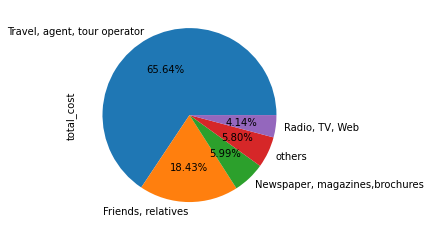

In [22]:
tz.groupby(['info_source'])['total_cost'].sum().nlargest().plot(kind = 'pie', autopct = '%1.2f%%',  shadow = False)

# TOTAL FEMALE


In [23]:
tz['total_female'].plot.hist(edgecolor = 'black', grid = False)
plt.title('histogram plot for total female')


Text(0.5, 1.0, 'histogram plot for total female')

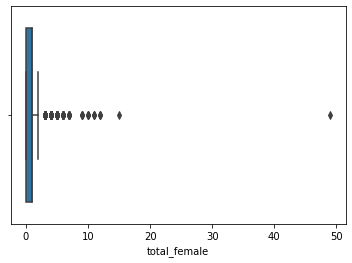

In [24]:
sns.boxplot(x = 'total_female', data = tz)
plt.style.use('bmh')

In [25]:
tz['total_female'].plot.kde(linewidth = 1, figsize = (4,2))


<AxesSubplot:ylabel='Density'>

The histogram plot shows a highest count values of 0 and 1 which covers about 34.7% and 50.30% respectively with a mean of 0.927 

# TOTAL MALE

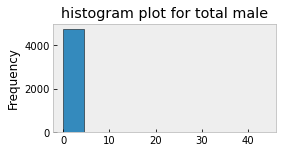

In [26]:
tz['total_male'].plot.hist(edgecolor = 'black', grid = False, figsize = (4,2))
plt.title('histogram plot for total male')
plt.show()

<AxesSubplot:xlabel='total_male'>

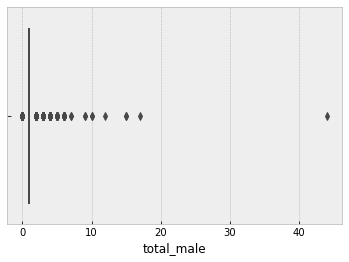

In [27]:
sns.boxplot(x = 'total_male', data =tz)


<AxesSubplot:xlabel='total_male', ylabel='Density'>

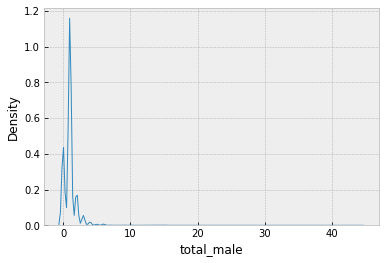

In [28]:
sns.kdeplot(x = 'total_male', linewidth = 1, data = tz)

The histogram plot shows a highest count values of 0 and 1 which covers about 23.7% and 61.6% respectively with a mean of 1.0098

# NIGHT MAINLAND

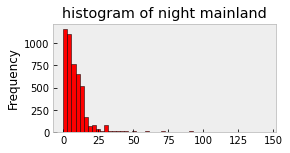

In [29]:
tz['night_mainland'].plot.hist(edgecolor = 'black', bins = 50, grid = False,color = 'red', figsize = (4,2))
plt.title('histogram of night mainland')
plt.show()

The night_nainland has a minimum and maximum value of 0 and 145 respectively. The mean night_mainland is 8.488

# NIGHT ZANZIBAR

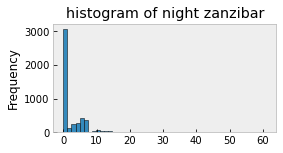

In [30]:
tz['night_zanzibar'].plot.hist(edgecolor = 'black', bins = 50, grid = False, figsize = (4,2))
plt.title('histogram of night zanzibar')
plt.show()

The night_zanzibar has a minimum and maximum value of 0 and 61 respectively. The mean night_mainland is 2.304 and a standard deviation of 4.277

# TOTAL COST

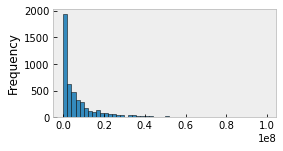

In [31]:
tz['total_cost'].plot.hist(edgecolor = 'black', bins = 50, grid = False, figsize = (4,2))
plt.show()

C:\Users\COMPUTER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cost', ylabel='Density'>

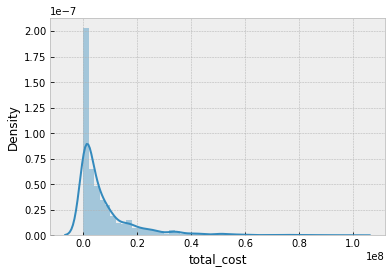

In [32]:
sns.distplot(tz['total_cost'])



The total cost has a minimum and maximum value of 49000 and 99532875 respectively. 

# What are the top 5 countries with the highest spending statistic ?

In [33]:
tz_country = tz.groupby('country')['total_cost'].sum().sort_values(ascending = False).head(6)
tz_country

country
UNITED STATES OF AMERICA    8.890832e+09
UNITED KINGDOM              3.808383e+09
ITALY                       3.762160e+09
FRANCE                      3.344496e+09
AUSTRALIA                   2.743132e+09
SOUTH AFRICA                2.594805e+09
Name: total_cost, dtype: float64

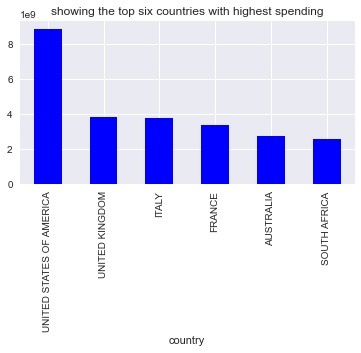

In [34]:
plt.style.use('seaborn')
tz_country.plot(figsize = (6,3), legend = False, kind = 'bar', colormap = 'winter')
plt.title('showing the top six countries with highest spending')
plt.show()

# which age-group are the highest spenders and who are the over all highest spenders by travel with?

In [35]:
tz_age = tz.groupby('age_group')['total_cost'].sum().sort_values(ascending = False)
tz_age

age_group
45-64    1.537184e+10
25-44    1.498710e+10
65+      5.284068e+09
1-24     3.379088e+09
Name: total_cost, dtype: float64

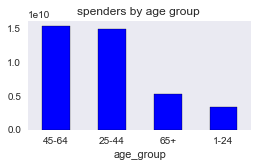

In [36]:
tz_age.plot.bar(edgecolor = 'black', colormap='winter', grid = False, figsize = (4,2))
plt.title('spenders by age group ')
plt.xticks(rotation = 'horizontal')
plt.show()

45-64 age_group are the highest spenders while 1-24 age group are the least spenders

In [37]:
tz['age_group'].value_counts()

25-44    2487
45-64    1391
1-24      624
65+       307
Name: age_group, dtype: int64

<AxesSubplot:ylabel='None'>

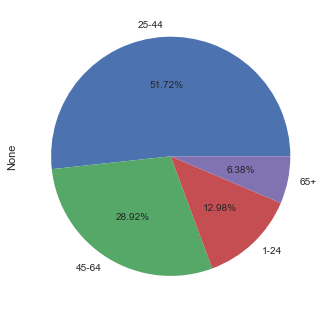

In [38]:
tz.value_counts('age_group').plot(kind = 'pie', autopct = '%1.2f%%')

The pie chart shows that the majority age group is 25 -44 and the least age group is 65+

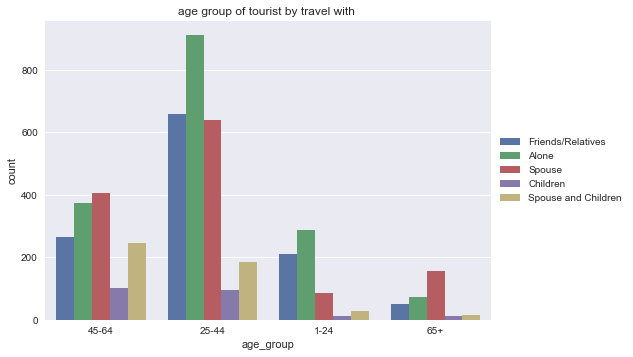

<Figure size 432x216 with 0 Axes>

In [39]:
sns.countplot(x = 'age_group', hue = 'travel_with', data = tz)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.title('age group of tourist by travel with ')
plt.figure(figsize = (6,3))
plt.show()

Age group 25 - 44 has the highest count of tourist who travelled alone, friend/relatives, spouse and age group 65+ has a least count of tourist who travelled with wife and children

In [40]:
tz_age_group = tz.groupby(['age_group', 'travel_with'])['total_cost'].sum()
tz_age_group
# age goup with repect to travel with total spendings

age_group  travel_with        
1-24       Alone                  1.073558e+09
           Children               3.906452e+07
           Friends/Relatives      1.545524e+09
           Spouse                 4.267596e+08
           Spouse and Children    2.941818e+08
25-44      Alone                  2.125659e+09
           Children               4.997074e+08
           Friends/Relatives      4.793482e+09
           Spouse                 5.314020e+09
           Spouse and Children    2.254231e+09
45-64      Alone                  1.623682e+09
           Children               1.162442e+09
           Friends/Relatives      3.020189e+09
           Spouse                 5.042900e+09
           Spouse and Children    4.522627e+09
65+        Alone                  7.135170e+08
           Children               1.716295e+08
           Friends/Relatives      9.079032e+08
           Spouse                 3.283155e+09
           Spouse and Children    2.078632e+08
Name: total_cost, dtype: floa

In [41]:
tz_travel_with = tz.groupby('travel_with')['total_cost'].sum().sort_values(ascending = False)
tz_travel_with

travel_with
Spouse                 1.406684e+10
Friends/Relatives      1.026710e+10
Spouse and Children    7.278903e+09
Alone                  5.536416e+09
Children               1.872843e+09
Name: total_cost, dtype: float64

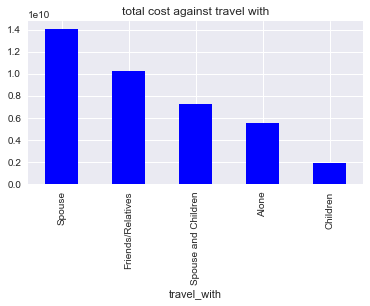

In [42]:
plt.style.use('seaborn')
tz_travel_with.plot(kind = 'bar', legend = False, colormap = 'winter', figsize = (6,3))
plt.title('total cost against travel with')
plt.show()

Tourist who travel with their spouse are the most spenders

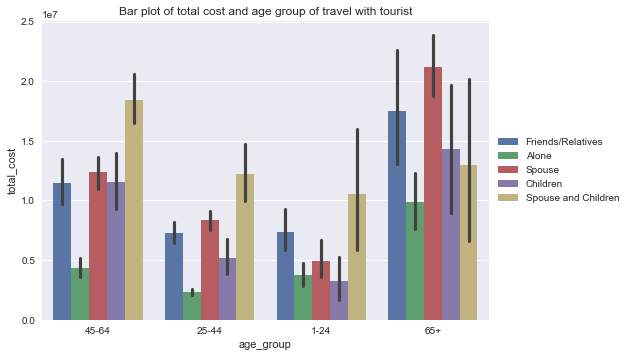

In [43]:
sns.barplot(y = 'total_cost', x = 'age_group',  hue = 'travel_with', data = tz)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.title('Bar plot of total cost and age group of travel with tourist')
plt.show()

Tourist who are 65+ and having spouse spend the highest cost, tourist in the age group of 25-44 who are alone spend the least

# what is the most prefered payment mode by tourists?



<AxesSubplot:xlabel='payment_mode', ylabel='count'>

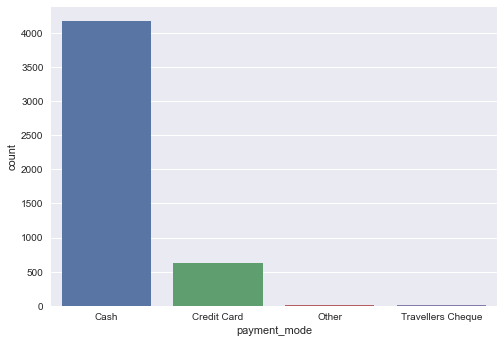

In [44]:
sns.countplot(x = 'payment_mode', data = tz)

The most preferred payment mode by tourist is cash.

# Highlight the Aspects of tourism that are more profitable and in which it is worthwhile to invest in

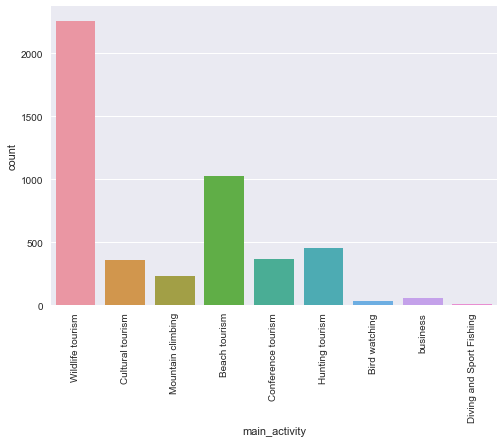

In [45]:
sns.countplot(x = 'main_activity', data = tz)
plt.xticks(rotation = 90)
plt.show()

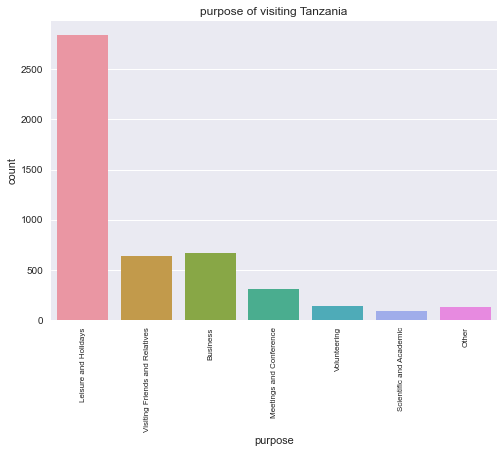

In [46]:
# considering the purpose
sns.countplot(x = 'purpose', data = tz)
plt.xticks(rotation = 90, fontsize = 8 )
plt.title('purpose of visiting Tanzania')
plt.show()


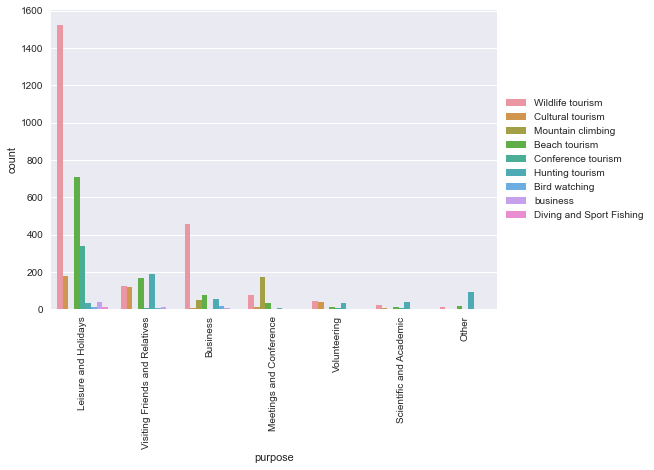

In [47]:
sns.countplot( x = 'purpose', hue = 'main_activity', data = tz)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.xticks (rotation =90)
plt.show()

The highest population of people who visit Tanzania go there for leisure and holidays mainly for wildlife tourism

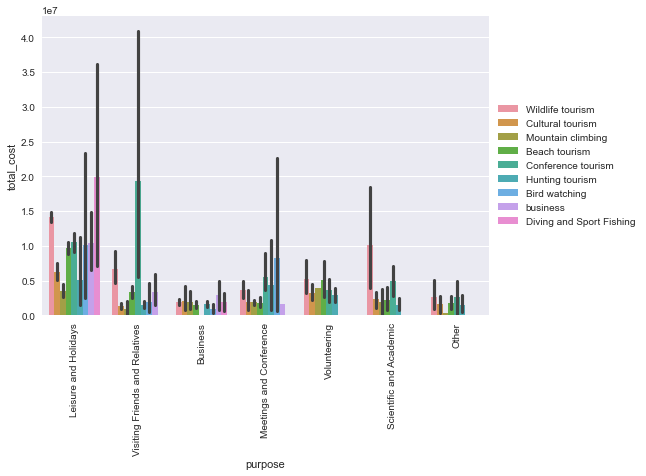

In [48]:
sns.barplot(x = 'purpose', y = 'total_cost', hue = 'main_activity', data = tz)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.xticks (rotation =90)
plt.show()

Aspects of tourism that are more profitable and in which it is worthwhile to invest in is diving and sport fishing where tourist spend more on

# what is the average number of nights a toursits spends in Tanzania mainland?



In [49]:
tz['night_mainland'].mean()

8.488043252235393

An average number of eight night was spent by tourist in Tanzania mainland

# what is the average number of nights a toursits spends in Zanzibar?

In [50]:
tz['night_zanzibar'].mean()

2.30442919525889

An average number of 2 night was spent by tourist in Zanzibar

# what is the most sort after food by tourists?

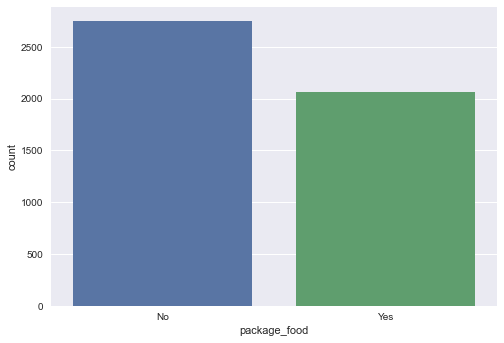

In [51]:
sns.countplot(x = 'package_food', data = tz)
plt.show()

Majority count of people who visit Tanzania do not sort after package food

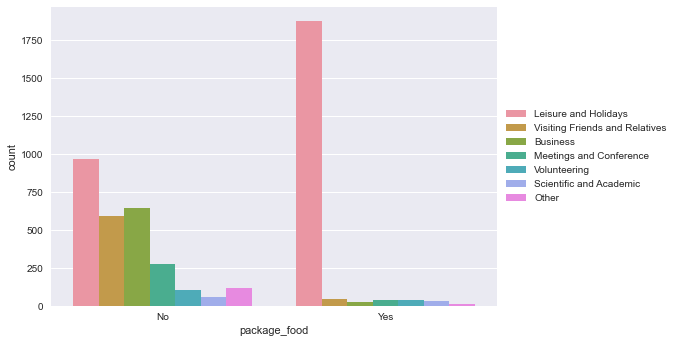

In [52]:
sns.countplot(x = 'package_food', hue = 'purpose', data = tz)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

Tourist who travel to Tanzania for leisure and holidays both have the highest count of package food and do not arrange for package food

In [53]:
sns.countplot(x = 'package_food', hue = 'main_activity', data = tz)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

Tourist who are in Tazania for wildlife tourism both have a high count for package food and no to package food

# HEATMAP

In [54]:
tz.corr()

total_female  total_male  night_mainland  night_zanzibar  \
total_female        1.000000    0.467000        0.031233        0.138523   
total_male          0.467000    1.000000       -0.041369        0.050172   
night_mainland      0.031233   -0.041369        1.000000       -0.118155   
night_zanzibar      0.138523    0.050172       -0.118155        1.000000   
total_cost          0.285862    0.183785        0.020473        0.145139   

                total_cost  
total_female      0.285862  
total_male        0.183785  
night_mainland    0.020473  
night_zanzibar    0.145139  
total_cost        1.000000

<AxesSubplot:>

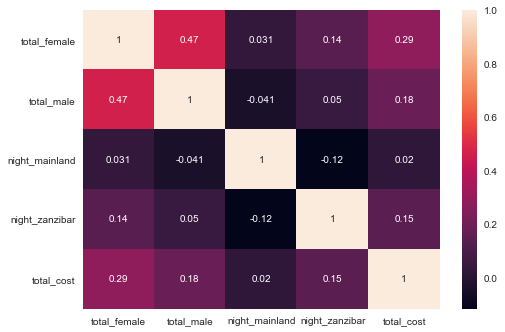

In [55]:
sns.heatmap(tz.corr(), annot = True)

The heatmap shows the correlation of the variables in the dataset

# pairplot to explore the relationship between the numerical features in the dataset

In [56]:
sns.pairplot(tz)

# Data Preprocessing

In [57]:
# lets call out our data set 
tz.head() #missing data have been treated and fixed where necessary

ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44  Friends/Relatives           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24             Spouse           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      Independent  ...                   No   
1                        others      Independent  ...                   No   
2            Friends, relatives      Independent  ...                   No   
3  Travel, agent, tour operator     Package Tour  ...                  Yes   
4  Travel, agent, tour operator      Independent  ...                   No   

  package_sightseeing package_guided_tour package_insurance night_mainland  \
0                  No                  No                No           13.0   
1                  No                  No                No           14.0   
2                  No                  No                No            1.0   
3                 Yes                 Yes                No           11.0   
4                  No                  No                No            7.0   

  night_zanzibar payment_mode  first_trip_tz  \
0            0.0         Cash             No   
1            7.0         Cash            Yes   
2           31.0         Cash             No   
3            0.0         Cash            Yes   
4            4.0         Cash            Yes   

                        most_impressing total_cost  
0                       Friendly People   674602.5  
1  Wonderful Country, Landscape, Nature  3214906.5  
2                  Excellent Experience  3315000.0  
3                       Friendly People  7790250.0  
4                           No comments  1657500.0  

[5 rows x 23 columns]

In [58]:
tz.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

# CHECKING MULTICOLLINEARITY

In [59]:
tz.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [60]:
num = ['float64']
num_vars = list(tz.select_dtypes(include = num))
num_vars

['total_female',
 'total_male',
 'night_mainland',
 'night_zanzibar',
 'total_cost']

In [61]:
df = tz[['total_female',
 'total_male',
 'night_mainland',
 'night_zanzibar',
 'total_cost'
 ]]
df.head()

total_female  total_male  night_mainland  night_zanzibar  total_cost
0           1.0         1.0            13.0             0.0    674602.5
1           1.0         0.0            14.0             7.0   3214906.5
2           0.0         1.0             1.0            31.0   3315000.0
3           1.0         1.0            11.0             0.0   7790250.0
4           1.0         0.0             7.0             4.0   1657500.0

In [62]:
p = df.iloc[:, 0:4]
p

total_female  total_male  night_mainland  night_zanzibar
0              1.0         1.0            13.0             0.0
1              1.0         0.0            14.0             7.0
2              0.0         1.0             1.0            31.0
3              1.0         1.0            11.0             0.0
4              1.0         0.0             7.0             4.0
...            ...         ...             ...             ...
4804           0.0         1.0             2.0             0.0
4805           1.0         1.0            11.0             0.0
4806           1.0         0.0             3.0             7.0
4807           1.0         1.0             5.0             0.0
4808           1.0         1.0             4.0             7.0

[4809 rows x 4 columns]

In [63]:
r = df['total_cost']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(p, r, test_size = 0.30, random_state = 0)

In [66]:
corrmatrix = x_train.corr()
corrmatrix

total_female  total_male  night_mainland  night_zanzibar
total_female        1.000000    0.243339        0.048562        0.156284
total_male          0.243339    1.000000       -0.038897        0.059172
night_mainland      0.048562   -0.038897        1.000000       -0.112687
night_zanzibar      0.156284    0.059172       -0.112687        1.000000

In [67]:
sns.heatmap(corrmatrix, annot = True)

<AxesSubplot:>

The heatmap shows us the correlation of the numerical variable of corrmatrix

In [68]:
def correlation (df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [69]:
correlation(x_train, 0.70)

set()

There is no feature with collinearity at the set threshold

# Building a Regression Model

In [70]:
tz.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [71]:
tz.head()

ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44  Friends/Relatives           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24             Spouse           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      Independent  ...                   No   
1                        others      Independent  ...                   No   
2            Friends, relatives      Independent  ...                   No   
3  Travel, agent, tour operator     Package Tour  ...                  Yes   
4  Travel, agent, tour operator      Independent  ...                   No   

  package_sightseeing package_guided_tour package_insurance night_mainland  \
0                  No                  No                No           13.0   
1                  No                  No                No           14.0   
2                  No                  No                No            1.0   
3                 Yes                 Yes                No           11.0   
4                  No                  No                No            7.0   

  night_zanzibar payment_mode  first_trip_tz  \
0            0.0         Cash             No   
1            7.0         Cash            Yes   
2           31.0         Cash             No   
3            0.0         Cash            Yes   
4            4.0         Cash            Yes   

                        most_impressing total_cost  
0                       Friendly People   674602.5  
1  Wonderful Country, Landscape, Nature  3214906.5  
2                  Excellent Experience  3315000.0  
3                       Friendly People  7790250.0  
4                           No comments  1657500.0  

[5 rows x 23 columns]

In [72]:
x = tz.drop(columns = [ 'country', 'payment_mode', 'ID', 'total_cost', 'most_impressing', 'info_source', 'first_trip_tz' ])
x

age_group        travel_with  total_female  total_male  \
0        45-64  Friends/Relatives           1.0         1.0   
1        25-44  Friends/Relatives           1.0         0.0   
2        25-44              Alone           0.0         1.0   
3        25-44             Spouse           1.0         1.0   
4         1-24             Spouse           1.0         0.0   
...        ...                ...           ...         ...   
4804     45-64              Alone           0.0         1.0   
4805     25-44             Spouse           1.0         1.0   
4806      1-24             Spouse           1.0         0.0   
4807     25-44  Friends/Relatives           1.0         1.0   
4808     25-44             Spouse           1.0         1.0   

                             purpose     main_activity tour_arrangement  \
0               Leisure and Holidays  Wildlife tourism      Independent   
1               Leisure and Holidays  Cultural tourism      Independent   
2     Visiting Friends and Relatives  Cultural tourism      Independent   
3               Leisure and Holidays  Wildlife tourism     Package Tour   
4               Leisure and Holidays  Wildlife tourism      Independent   
...                              ...               ...              ...   
4804                        Business   Hunting tourism      Independent   
4805            Leisure and Holidays  Wildlife tourism     Package Tour   
4806            Leisure and Holidays  Wildlife tourism      Independent   
4807                        Business     Beach tourism      Independent   
4808            Leisure and Holidays  Wildlife tourism     Package Tour   

     package_transport_int package_accomodation package_food  \
0                       No                   No           No   
1                       No                   No           No   
2                       No                   No           No   
3                       No                  Yes          Yes   
4                       No                   No           No   
...                    ...                  ...          ...   
4804                    No                   No           No   
4805                   Yes                  Yes          Yes   
4806                    No                   No           No   
4807                   Yes                  Yes          Yes   
4808                   Yes                  Yes          Yes   

     package_transport_tz package_sightseeing package_guided_tour  \
0                      No                  No                  No   
1                      No                  No                  No   
2                      No                  No                  No   
3                     Yes                 Yes                 Yes   
4                      No                  No                  No   
...                   ...                 ...                 ...   
4804                   No                  No                  No   
4805                  Yes                 Yes                 Yes   
4806                   No                  No                  No   
4807                   No                  No                  No   
4808                  Yes                 Yes                 Yes   

     package_insurance  night_mainland  night_zanzibar  
0                   No            13.0             0.0  
1                   No            14.0             7.0  
2                   No             1.0            31.0  
3                   No            11.0             0.0  
4                   No             7.0             4.0  
...                ...             ...             ...  
4804                No             2.0             0.0  
4805               Yes            11.0             0.0  
4806                No             3.0             7.0  
4807                No             5.0             0.0  
4808                No             4.0             7.0  

[4809 rows x 16 columns]

In [73]:
y = tz['total_cost']

In [74]:
# Encoding our data set for training
x = pd.get_dummies(x)
x

total_female  total_male  night_mainland  night_zanzibar  \
0              1.0         1.0            13.0             0.0   
1              1.0         0.0            14.0             7.0   
2              0.0         1.0             1.0            31.0   
3              1.0         1.0            11.0             0.0   
4              1.0         0.0             7.0             4.0   
...            ...         ...             ...             ...   
4804           0.0         1.0             2.0             0.0   
4805           1.0         1.0            11.0             0.0   
4806           1.0         0.0             3.0             7.0   
4807           1.0         1.0             5.0             0.0   
4808           1.0         1.0             4.0             7.0   

      age_group_1-24  age_group_25-44  age_group_45-64  age_group_65+  \
0                  0                0                1              0   
1                  0                1                0              0   
2                  0                1                0              0   
3                  0                1                0              0   
4                  1                0                0              0   
...              ...              ...              ...            ...   
4804               0                0                1              0   
4805               0                1                0              0   
4806               1                0                0              0   
4807               0                1                0              0   
4808               0                1                0              0   

      travel_with_Alone  travel_with_Children  ...  package_food_No  \
0                     0                     0  ...                1   
1                     0                     0  ...                1   
2                     1                     0  ...                1   
3                     0                     0  ...                0   
4                     0                     0  ...                1   
...                 ...                   ...  ...              ...   
4804                  1                     0  ...                1   
4805                  0                     0  ...                0   
4806                  0                     0  ...                1   
4807                  0                     0  ...                0   
4808                  0                     0  ...                0   

      package_food_Yes  package_transport_tz_No  package_transport_tz_Yes  \
0                    0                        1                         0   
1                    0                        1                         0   
2                    0                        1                         0   
3                    1                        0                         1   
4                    0                        1                         0   
...                ...                      ...                       ...   
4804                 0                        1                         0   
4805                 1                        0                         1   
4806                 0                        1                         0   
4807                 1                        1                         0   
4808                 1                        0                         1   

      package_sightseeing_No  package_sightseeing_Yes  package_guided_tour_No  \
0                          1                        0                       1   
1                          1                        0                       1   
2                          1                        0                       1   
3                          0                        1                       0   
4                          1                        0                       1   
...                      ...                      ...                   

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, train_size = 0.70, random_state = 0)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
x_train

array([[0.06666667, 0.06666667, 0.03448276, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.06666667, 0.00689655, ..., 0.        , 1.        ,
        0.        ],
       [0.06666667, 0.06666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.06666667, 0.        , 0.00689655, ..., 0.        , 1.        ,
        0.        ],
       [0.13333333, 0.06666667, 0.02758621, ..., 1.        , 1.        ,
        0.        ],
       [0.06666667, 0.        , 0.04137931, ..., 1.        , 1.        ,
        0.        ]])

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()

In [82]:
model.fit(x_train, y_train)

LinearRegression()

In [83]:
model.intercept_

2.9079651349221954e+19

In [84]:
model.coef_

array([ 2.10219744e+07,  2.24233753e+07,  1.21003342e+07,  1.32624155e+07,
       -1.84360674e+18, -1.84360674e+18, -1.84360674e+18, -1.84360674e+18,
       -4.94179667e+19, -4.94179667e+19, -4.94179667e+19, -4.94179667e+19,
       -4.94179667e+19,  2.74729840e+19,  2.74729840e+19,  2.74729840e+19,
        2.74729840e+19,  2.74729840e+19,  2.74729840e+19,  2.74729840e+19,
       -1.22236968e+19, -1.22236968e+19, -1.22236968e+19, -1.22236968e+19,
       -1.22236968e+19, -1.22236968e+19, -1.22236968e+19, -1.22236968e+19,
       -1.22236968e+19,  1.16219654e+18,  1.16219654e+18, -1.90576969e+18,
       -1.90576969e+18, -8.00858477e+15, -8.00858477e+15,  2.52443411e+18,
        2.52443411e+18, -2.47831827e+16, -2.47831827e+16,  1.23975372e+18,
        1.23975372e+18,  1.97340877e+18,  1.97340877e+18,  1.97140321e+18,
        1.97140321e+18])

In [85]:
prediction = model.predict(x_test)
prediction

array([ 8544256., 15101952.,  4468736., ...,  9125888.,  3698688.,
        2174976.])

In [86]:
y_test

825       530400.0
1705    13842913.0
4133     1259900.0
3537    22376250.0
3555      411600.0
           ...    
2157     8494687.5
1300    14420250.0
2383     2734875.0
242       994500.0
3626       56628.0
Name: total_cost, Length: 1443, dtype: float64

In [87]:
from numpy import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [88]:
math.sqrt(mean_squared_error(y_test, prediction))

10245449.3440015

# Evaluate Model Performances

In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [90]:
score = r2_score(y_test, prediction)
score

0.279164433125888

linear regression model perform poorly and not a good model to evaluate the dataset

In [91]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)

In [92]:
mae

5825199.193148994

In [93]:
mse

104969232260500.75

In [94]:
rmse

10245449.3440015

In [95]:
print(model.score(x_test,y_test))
print(model.score(x_train, y_train))

0.279164433125888
0.3561318991325134


# Testing Linear Model Assumptions

In [96]:
# importing the test dataset
tz2 = pd.read_csv('Test .csv')
tz2.head()


ID         country age_group        travel_with  total_female  \
0     tour_1       AUSTRALIA     45-64             Spouse           1.0   
1   tour_100    SOUTH AFRICA     25-44  Friends/Relatives           0.0   
2  tour_1001         GERMANY     25-44  Friends/Relatives           3.0   
3  tour_1006          CANADA    24-Jan  Friends/Relatives           2.0   
4  tour_1009  UNITED KINGDOM     45-64  Friends/Relatives           2.0   

   total_male               purpose     main_activity  \
0         1.0  Leisure and Holidays  Wildlife tourism   
1         4.0              Business  Wildlife tourism   
2         0.0  Leisure and Holidays     Beach tourism   
3         0.0  Leisure and Holidays  Cultural tourism   
4         2.0  Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_food  \
0  Travel, agent, tour operator     Package Tour  ...          Yes   
1       Tanzania Mission Abroad     Package Tour  ...           No   
2            Friends, relatives      Independent  ...           No   
3                        others      Independent  ...           No   
4            Friends, relatives     Package Tour  ...          Yes   

  package_transport_tz package_sightseeing package_guided_tour  \
0                  Yes                 Yes                 Yes   
1                   No                  No                  No   
2                   No                  No                  No   
3                   No                  No                  No   
4                  Yes                  No                  No   

  package_insurance night_mainland night_zanzibar  payment_mode  \
0               Yes             10              3          Cash   
1                No             13              0          Cash   
2                No              7             14          Cash   
3                No              0              4          Cash   
4                No             10              0          Cash   

   first_trip_tz                       most_impressing  
0            Yes                              Wildlife  
1             No  Wonderful Country, Landscape, Nature  
2             No                           No comments  
3            Yes                       Friendly People  
4            Yes                       Friendly People  

[5 rows x 22 columns]

In [97]:
tz2.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

In [98]:
tz2.isna().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

Lets clean and fill Nan

In [99]:
tz2['travel_with'].fillna(method = 'ffill', inplace = True)
tz2['most_impressing'].fillna(method = 'ffill', inplace = True)
tz2['total_female'].fillna(method = 'bfill', inplace = True)
tz2['total_male'].fillna(method = 'bfill', inplace = True)


In [100]:
tz2.age_group.value_counts()

25-44     866
45-64     447
24-Jan    202
65+        86
Name: age_group, dtype: int64

In [101]:
tz2.loc[(tz2['age_group'] == '24-Jan'), 'age_group'] = '1-24' 

In [102]:
tz2.age_group.value_counts()

25-44    866
45-64    447
1-24     202
65+       86
Name: age_group, dtype: int64

In [103]:
tz2

ID                   country age_group          travel_with  \
0        tour_1                 AUSTRALIA     45-64               Spouse   
1      tour_100              SOUTH AFRICA     25-44    Friends/Relatives   
2     tour_1001                   GERMANY     25-44    Friends/Relatives   
3     tour_1006                    CANADA      1-24    Friends/Relatives   
4     tour_1009            UNITED KINGDOM     45-64    Friends/Relatives   
...         ...                       ...       ...                  ...   
1596   tour_988  UNITED STATES OF AMERICA     25-44    Friends/Relatives   
1597   tour_990                     ITALY     45-64  Spouse and Children   
1598   tour_992                   FINLAND     25-44                Alone   
1599   tour_996              SOUTH AFRICA      1-24                Alone   
1600   tour_998              SOUTH AFRICA     25-44               Spouse   

      total_female  total_male                  purpose      main_activity  \
0              1.0         1.0     Leisure and Holidays   Wildlife tourism   
1              0.0         4.0                 Business   Wildlife tourism   
2              3.0         0.0     Leisure and Holidays      Beach tourism   
3              2.0         0.0     Leisure and Holidays   Cultural tourism   
4              2.0         2.0     Leisure and Holidays   Wildlife tourism   
...            ...         ...                      ...                ...   
1596           0.0         1.0  Meetings and Conference  Mountain climbing   
1597           3.0         1.0     Leisure and Holidays   Wildlife tourism   
1598           0.0         1.0  Meetings and Conference  Mountain climbing   
1599           0.0         1.0                 Business      Beach tourism   
1600           1.0         1.0     Leisure and Holidays   Cultural tourism   

                         info_source tour_arrangement  ... package_food  \
0       Travel, agent, tour operator     Package Tour  ...          Yes   
1            Tanzania Mission Abroad     Package Tour  ...           No   
2                 Friends, relatives      Independent  ...           No   
3                             others      Independent  ...           No   
4                 Friends, relatives     Package Tour  ...          Yes   
...                              ...              ...  ...          ...   
1596  Newspaper, magazines,brochures      Independent  ...           No   
1597              Friends, relatives     Package Tour  ...          Yes   
1598              Friends, relatives      Independent  ...           No   
1599              Friends, relatives      Independent  ...           No   
1600                  Radio, TV, Web      Independent  ...           No   

     package_transport_tz package_sightseeing package_guided_tour  \
0                     Yes                 Yes                 Yes   
1                      No                  No                  No   
2                      No                  No                  No   
3                      No                  No                  No   
4                     Yes                  No                  No   
...                   ...                 ...                 ...   
1596                   No                  No                  No   
1597                  Yes                 Yes                  No   
1598                   No                  No                  No   
1599                   No                  No                  No   
1600                   No                  No                  No   

     package_insurance night_mainland night_zanzibar  payment_mode  \
0                  Yes             10              3          Cash   
1                   No             13              0          Cash   
2                   No              7             14          Cash   
3                   No              0              4          Cash   
4                   No             10              0          Cash   
...          

In [104]:
z = tz2.drop(columns = ['ID', 'country', 'payment_mode', 'most_impressing', 'info_source', 'first_trip_tz'  ])
z

age_group          travel_with  total_female  total_male  \
0        45-64               Spouse           1.0         1.0   
1        25-44    Friends/Relatives           0.0         4.0   
2        25-44    Friends/Relatives           3.0         0.0   
3         1-24    Friends/Relatives           2.0         0.0   
4        45-64    Friends/Relatives           2.0         2.0   
...        ...                  ...           ...         ...   
1596     25-44    Friends/Relatives           0.0         1.0   
1597     45-64  Spouse and Children           3.0         1.0   
1598     25-44                Alone           0.0         1.0   
1599      1-24                Alone           0.0         1.0   
1600     25-44               Spouse           1.0         1.0   

                      purpose      main_activity tour_arrangement  \
0        Leisure and Holidays   Wildlife tourism     Package Tour   
1                    Business   Wildlife tourism     Package Tour   
2        Leisure and Holidays      Beach tourism      Independent   
3        Leisure and Holidays   Cultural tourism      Independent   
4        Leisure and Holidays   Wildlife tourism     Package Tour   
...                       ...                ...              ...   
1596  Meetings and Conference  Mountain climbing      Independent   
1597     Leisure and Holidays   Wildlife tourism     Package Tour   
1598  Meetings and Conference  Mountain climbing      Independent   
1599                 Business      Beach tourism      Independent   
1600     Leisure and Holidays   Cultural tourism      Independent   

     package_transport_int package_accomodation package_food  \
0                      Yes                  Yes          Yes   
1                      Yes                  Yes           No   
2                       No                   No           No   
3                       No                   No           No   
4                      Yes                  Yes          Yes   
...                    ...                  ...          ...   
1596                    No                   No           No   
1597                    No                  Yes          Yes   
1598                    No                   No           No   
1599                    No                   No           No   
1600                    No                   No           No   

     package_transport_tz package_sightseeing package_guided_tour  \
0                     Yes                 Yes                 Yes   
1                      No                  No                  No   
2                      No                  No                  No   
3                      No                  No                  No   
4                     Yes                  No                  No   
...                   ...                 ...                 ...   
1596                   No                  No                  No   
1597                  Yes                 Yes                  No   
1598                   No                  No                  No   
1599                   No                  No                  No   
1600                   No                  No                  No   

     package_insurance  night_mainland  night_zanzibar  
0                  Yes              10               3  
1                   No              13               0  
2                   No               7              14  
3                   No               0               4  
4                   No              10               0  
...                ...             ...             ...  
1596                No               1               0  
1597                No              10               5  
1598                No               6               0  
1599                No               4               0  
1600                No               9               5  

[1601 rows x 16 columns]

In [105]:
z = pd.get_dummies(z) #Encoding
z

total_female  total_male  night_mainland  night_zanzibar  \
0              1.0         1.0              10               3   
1              0.0         4.0              13               0   
2              3.0         0.0               7              14   
3              2.0         0.0               0               4   
4              2.0         2.0              10               0   
...            ...         ...             ...             ...   
1596           0.0         1.0               1               0   
1597           3.0         1.0              10               5   
1598           0.0         1.0               6               0   
1599           0.0         1.0               4               0   
1600           1.0         1.0               9               5   

      age_group_1-24  age_group_25-44  age_group_45-64  age_group_65+  \
0                  0                0                1              0   
1                  0                1                0              0   
2                  0                1                0              0   
3                  1                0                0              0   
4                  0                0                1              0   
...              ...              ...              ...            ...   
1596               0                1                0              0   
1597               0                0                1              0   
1598               0                1                0              0   
1599               1                0                0              0   
1600               0                1                0              0   

      travel_with_Alone  travel_with_Children  ...  package_food_No  \
0                     0                     0  ...                0   
1                     0                     0  ...                1   
2                     0                     0  ...                1   
3                     0                     0  ...                1   
4                     0                     0  ...                0   
...                 ...                   ...  ...              ...   
1596                  0                     0  ...                1   
1597                  0                     0  ...                0   
1598                  1                     0  ...                1   
1599                  1                     0  ...                1   
1600                  0                     0  ...                1   

      package_food_Yes  package_transport_tz_No  package_transport_tz_Yes  \
0                    1                        0                         1   
1                    0                        1                         0   
2                    0                        1                         0   
3                    0                        1                         0   
4                    1                        0                         1   
...                ...                      ...                       ...   
1596                 0                        1                         0   
1597                 1                        0                         1   
1598                 0                        1                         0   
1599                 0                        1                         0   
1600                 0                        1                         0   

      package_sightseeing_No  package_sightseeing_Yes  package_guided_tour_No  \
0                          0                        1                       0   
1                          1                        0                       1   
2                          1                        0                       1   
3                          1                        0                       1   
4                          1                        0                       1   
...                      ...                      ...                   

In [106]:
model.fit(x, y)

LinearRegression()

In [107]:
predictions = model.predict(z)

In [108]:
predictions

array([18288618.03153989, 11058112.3520682 ,  7044555.01761863, ...,
       -1369307.94169107, -2354306.83891222,  3017495.87123583])

In [109]:
new_total_cost = tz2.assign(predicted_price = predictions)
new_total_cost

ID                   country age_group          travel_with  \
0        tour_1                 AUSTRALIA     45-64               Spouse   
1      tour_100              SOUTH AFRICA     25-44    Friends/Relatives   
2     tour_1001                   GERMANY     25-44    Friends/Relatives   
3     tour_1006                    CANADA      1-24    Friends/Relatives   
4     tour_1009            UNITED KINGDOM     45-64    Friends/Relatives   
...         ...                       ...       ...                  ...   
1596   tour_988  UNITED STATES OF AMERICA     25-44    Friends/Relatives   
1597   tour_990                     ITALY     45-64  Spouse and Children   
1598   tour_992                   FINLAND     25-44                Alone   
1599   tour_996              SOUTH AFRICA      1-24                Alone   
1600   tour_998              SOUTH AFRICA     25-44               Spouse   

      total_female  total_male                  purpose      main_activity  \
0              1.0         1.0     Leisure and Holidays   Wildlife tourism   
1              0.0         4.0                 Business   Wildlife tourism   
2              3.0         0.0     Leisure and Holidays      Beach tourism   
3              2.0         0.0     Leisure and Holidays   Cultural tourism   
4              2.0         2.0     Leisure and Holidays   Wildlife tourism   
...            ...         ...                      ...                ...   
1596           0.0         1.0  Meetings and Conference  Mountain climbing   
1597           3.0         1.0     Leisure and Holidays   Wildlife tourism   
1598           0.0         1.0  Meetings and Conference  Mountain climbing   
1599           0.0         1.0                 Business      Beach tourism   
1600           1.0         1.0     Leisure and Holidays   Cultural tourism   

                         info_source tour_arrangement  ...  \
0       Travel, agent, tour operator     Package Tour  ...   
1            Tanzania Mission Abroad     Package Tour  ...   
2                 Friends, relatives      Independent  ...   
3                             others      Independent  ...   
4                 Friends, relatives     Package Tour  ...   
...                              ...              ...  ...   
1596  Newspaper, magazines,brochures      Independent  ...   
1597              Friends, relatives     Package Tour  ...   
1598              Friends, relatives      Independent  ...   
1599              Friends, relatives      Independent  ...   
1600                  Radio, TV, Web      Independent  ...   

     package_transport_tz package_sightseeing package_guided_tour  \
0                     Yes                 Yes                 Yes   
1                      No                  No                  No   
2                      No                  No                  No   
3                      No                  No                  No   
4                     Yes                  No                  No   
...                   ...                 ...                 ...   
1596                   No                  No                  No   
1597                  Yes                 Yes                  No   
1598                   No                  No                  No   
1599                   No                  No                  No   
1600                   No                  No                  No   

     package_insurance night_mainland night_zanzibar payment_mode  \
0                  Yes             10              3         Cash   
1                   No             13              0         Cash   
2                   No              7             14         Cash   
3                   No              0              4         Cash   
4                   No             10              0         Cash   
...                ...            ...            ...          ...   
1596                No              1              0         Cash   
1597                No             10

# Actionable Insights and Recommendations

In [113]:
plt.scatter(y_test, prediction)

Linear regression model was used for this study and it gave an r2 score of 0.279. linear regression model perform poorly and not a good model to evaluate the dataset.
   we recommend therefore, that other models show be used to model the dataset for high performance.